In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.colors import ListedColormap

style.use('ggplot')

# **1.Percolation**

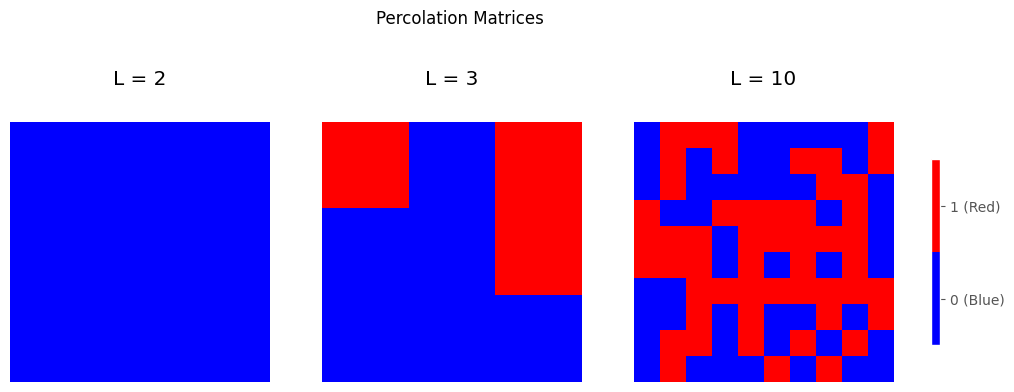

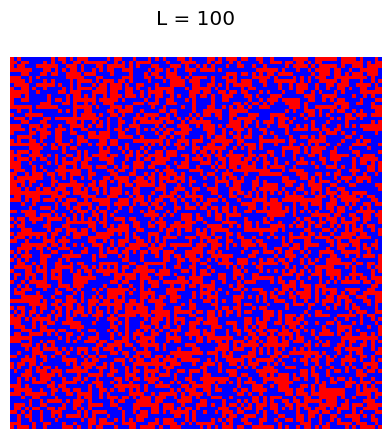

In [ ]:
#first part of this question is fairly simple,i will make a function to return resulting matrix(filled with 0s and 1s)
np.random.seed(0)
def Percolation(L,p):
  matrix=np.random.rand(L,L)
  return (matrix<=p).astype(bool)

#lets check how it works
L2=Percolation(2,0.5)
L3=Percolation(3,0.5)
L10=Percolation(10,0.5)
L100=Percolation(100,0.5)

fig,ax=plt.subplots(1,3,figsize=(12,5))
cmap=mcolors.ListedColormap(['blue','red'])#i represent 0s with blue and 1s with red
ax[0].matshow(L2,cmap=cmap)
ax[0].grid(visible=False)
ax[1].matshow(L3,cmap=cmap)
ax[1].grid(visible=False)
ax[2].matshow(L10,cmap=cmap)
ax[2].grid(visible=False)
ax[0].set_title('L = 2',pad=10)
ax[1].set_title('L = 3',pad=10)
ax[2].set_title('L = 10',pad=10)
cbar = fig.colorbar(ax[2].images[0],ax=ax,orientation='vertical',fraction=0.01,pad=0.04)
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['0 (Blue)', '1 (Red)'])
fig.suptitle('Percolation Matrices')
for a in ax:
  a.axis("off")

plt.show()

plt.matshow(L100,cmap=cmap)
plt.grid(visible=False)
plt.axis("off")
plt.title('L = 100')
plt.show()

In [ ]:
#now i make a function that calculate the resulting matrix has transverse percolation or not,here i used Depth-First Search (DFS) algorithm,it is one of the common graph algorithm for this kind of questions
def can_traverse_matrix(matrix):
    rows = len(matrix)
    cols = len(matrix[0])

    for i in range(rows):
        if matrix[i][0] == 1:
            if dfs(matrix, i, 0, set()):
                return 1
    return 0


def dfs(matrix, row, col, visited):
    rows = len(matrix)
    cols = len(matrix[0])

    if col == cols - 1:
        return True

    visited.add((row, col))
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dr, dc in directions:
        new_row, new_col = row + dr, col + dc
        if (0 <= new_row < rows and 0 <= new_col < cols and
            matrix[new_row][new_col] == 1 and
            (new_row, new_col) not in visited):
            if dfs(matrix, new_row, new_col, visited):
                return True

    visited.remove((row, col))
    return False


print(can_traverse_matrix(L10))#here you can see it algorithm works!





1


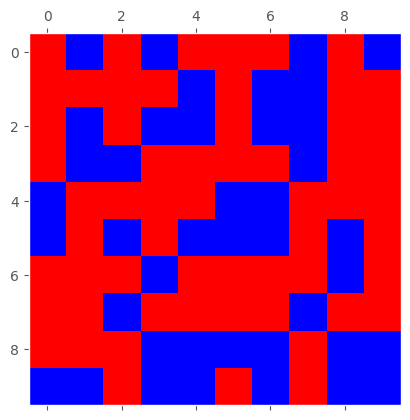

0

In [ ]:
mat=Percolation(10,0.6)
plt.matshow(mat,cmap=cmap)
plt.grid(visible=False)
plt.show()
can_traverse_matrix(mat)

# **2.Coloring algorithm**

In [ ]:
def coloring(L,p):
  mat=np.zeros(shape=(L,L),dtype=np.uint64)
  mat[:,0] = 1
  mat[:,-1] = L*L
  probab=np.random.rand(L ,L )
  counter = 2
  for i in range(L ):
    for j in range(1,L-1 ):
      if probab[i,j] <= p:
        mat[i,j]=counter
        counter+=1

        if mat[i,j] != 0:
          neighbours = [ (-1 ,0 ) , (1 ,0 ) , (0 ,-1 ) , (0 ,1 ) ]
          nonzero=[]

          for x,y in neighbours:
            if 0<= i+x <L and 0<=j+y<L and mat[i+x,j+y] != 0:
              nonzero.append([x,y])

          if len(nonzero)==0:
            continue
          if len(nonzero)==1:
            mat[i,j]=mat[i+nonzero[0][0],j+nonzero[0][1]]

          else:
            neighbours_value=np.array([mat[i+x,j+y] for x,y in nonzero])
            v=np.min(neighbours_value)
            mat[i,j]=v
            for x,y in nonzero:
              mat[i+x,j+y]=v


  if np.any(mat[:,-1]==1):
    return (mat,1)
  else:
    return (mat,0)









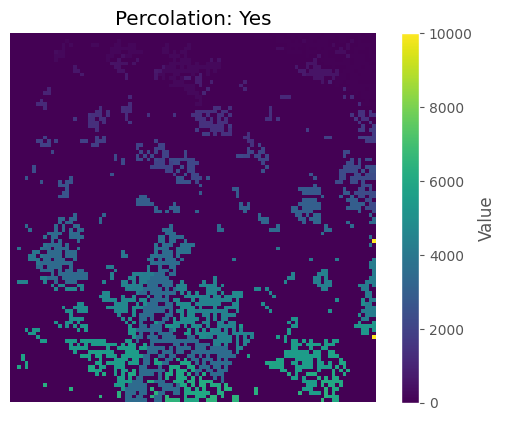

In [ ]:
mat, result = coloring(100, 0.675)

plt.imshow(mat[:,:-1], cmap='viridis')#here i droped the right side for better visualization,it doesnt matter in the final result if we keep it
plt.grid(visible=False)
plt.axis('off')
cbar = plt.colorbar(label='Value')

plt.title(f"Percolation: {'Yes' if result == 1 else 'No'}")
plt.show()

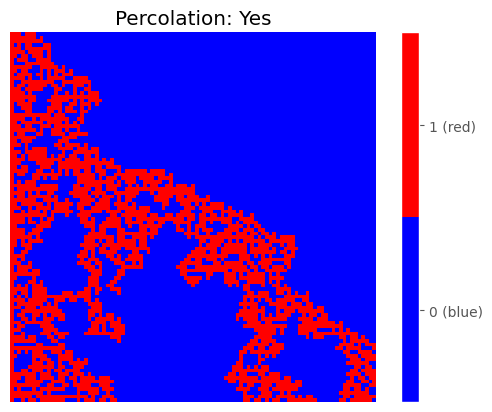

In [ ]:
mat[mat!=1]=0#for better visualization i only kept 1s
plt.imshow(mat[:,:-1], cmap=ListedColormap(['blue','red']))
plt.grid(visible=False)
plt.axis('off')
cbar = plt.colorbar(fraction=0.05,pad=0.05)
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['0 (blue)', '1 (red)'])
plt.title(f"Percolation: {'Yes' if result == 1 else 'No'}")
plt.show()

# **3.Hoshen-Kopelman**

In [ ]:
def Hoshen_Kopelman(L,p):
  mat = np.zeros(shape = (L,L), dtype = np.uint64)
  mat[:,0] = 1#in the text the example matrix hasnt this 1s column so after this i will do this again for the general form
  probability=np.random.rand(L,L)
  Label=[0,1]
  S=[0,0]

  for j in range(1,L):
    for i in range(L):
      if probability[i,j] <= p:
        neighbors = [ (-1,0) , (0,-1) ]
        nonzero_neighbors=[]
        for x,y in neighbors:
          if 0<= i+x <L and 0<=j+y<L and mat[i+x,j+y] != 0:
            nonzero_neighbors.append(mat[i+x,j+y])
        if len(nonzero_neighbors)==0:
          mat[i,j] = Label[-1] + 1
          Label.append(Label[-1] + 1)
          S.append(1)

        elif len(nonzero_neighbors) == 1:
          mat[i,j] = nonzero_neighbors[0]
          S[nonzero_neighbors[0]]+=1
        else:
          min_label = min(nonzero_neighbors)
          mat[i, j] = min_label
          for label in nonzero_neighbors:
            if label != min_label:
              S[min_label] += S[label]+1
              S[label] = 0
              mat[mat == label] = min_label

  if np.any(mat[:,-1]==1):
    return (mat,S,1)
  else:
    return (mat,S,0)

mat , S, result = Hoshen_Kopelman(10,0.68)

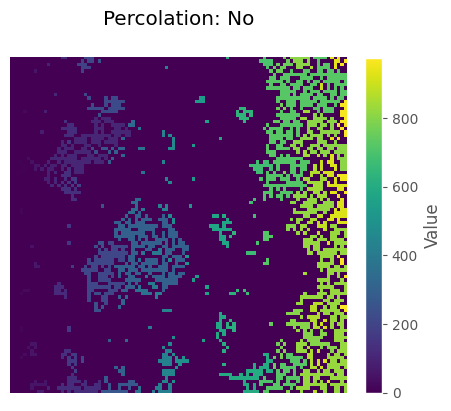

In [ ]:
plt.matshow(mat,cmap='viridis')
plt.grid(visible=False)
plt.axis('off')
cbar = plt.colorbar(fraction=0.045,label='Value')
plt.title(f"Percolation: {'Yes' if result == 1 else 'No'}")
plt.show()

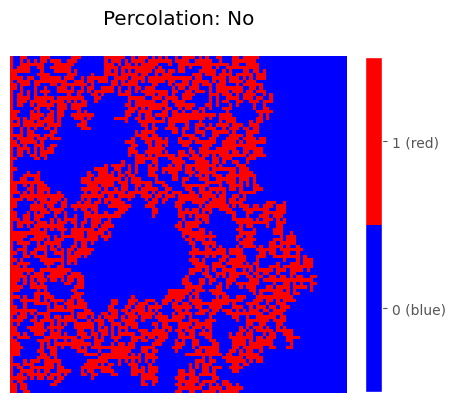

In [ ]:
#for better visualization i only keep 1s and assign 0 to other labels
mat[mat!=1]=0
plt.matshow(mat,cmap=ListedColormap(['blue','red']))
plt.grid(visible=False)
plt.axis('off')
cbar = plt.colorbar(fraction=0.045)
cbar.set_ticks([0.25,0.75])
cbar.set_ticklabels(['0 (blue)','1 (red)'])
plt.title(f"Percolation: {'Yes' if result == 1 else 'No'}")
plt.show()

In [ ]:
%time mat,s,result=Hoshen_Kopelman(1000,0.6)

CPU times: user 1min 1s, sys: 150 ms, total: 1min 1s
Wall time: 1min 3s


In [ ]:
%time mat,result=coloring(1000,0.6)

CPU times: user 8.08 s, sys: 19.1 ms, total: 8.1 s
Wall time: 8.18 s


In [3]:
def Hoshen_Kopelman2(L,p):
  mat = np.zeros(shape = (L,L), dtype = np.uint64)
  probability=np.random.rand(L,L)
  Label=[0]#at first, only label is 0
  S=[0]#wont follow the number of zeros

  for j in range(L):

    for i in range(L):
      if probability[i,j] <= p:
        neighbors = [ (-1,0) , (0,-1) ]
        nonzero_neighbors=[]

        for x,y in neighbors:
          if 0<= i+x <L and 0<=j+y<L and mat[i+x,j+y] != 0:
            nonzero_neighbors.append(mat[i+x,j+y])
        if len(nonzero_neighbors)==0:
          mat[i,j] = Label[-1] + 1
          Label.append(Label[-1] + 1)
          S.append(1)

        elif len(nonzero_neighbors) == 1:
          mat[i,j] = nonzero_neighbors[0]
          S[nonzero_neighbors[0]]+=1

        else:
          min_label = min(nonzero_neighbors)
          mat[i, j] = min_label
          S[min_label] += 1
          for label in nonzero_neighbors:
            if label != min_label:
              S[min_label] += S[label]
              S[label] = 0
              mat[mat == label] = min_label

  values = []
  for i in range(L):
      if mat[i, 0] != 0:
          for j in range(L):
              if mat[i, 0] == mat[j, -1]:  #percolation condition
                  values.append(mat[i, 0])#i want to have every value which represents infinite cluster

  if len(values) != 0:
    return (mat,values,S,1)
  else:
    return (mat,values,S,0)


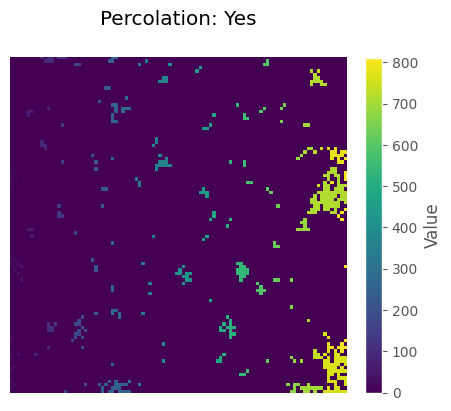

In [18]:
mat , values,S, result = Hoshen_Kopelman2(100,0.65)
plt.matshow(mat,cmap='viridis')
plt.grid(visible=False)
plt.axis('off')
cbar = plt.colorbar(fraction=0.045,label='Value')
plt.title(f"Percolation: {'Yes' if result == 1 else 'No'}")
plt.show()

# **4.infinite cluster probability**

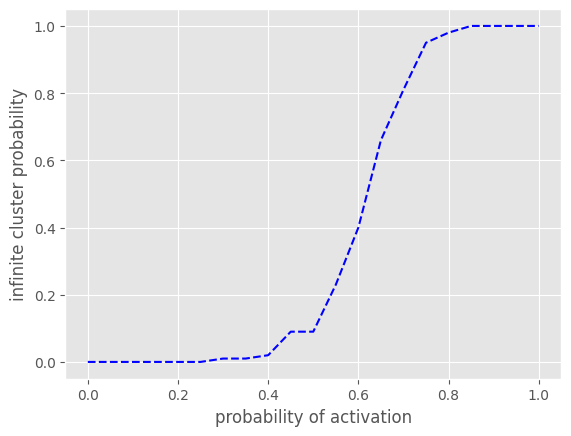

In [ ]:
#i wont change the code from previous questions
pdistribution = np.arange(0.0, 1.05, 0.05)
Q=[]
for p in pdistribution:
  counter = 0

  for i in range(100):
    mat, result = coloring(10,p)
    if result == 1:
      counter += 1

  Q.append(counter/100)


plt.plot(pdistribution,Q,linestyle='--',c='blue')
plt.xlabel('probability of activation')
plt.ylabel('infinite cluster probability')
#plt.title('Infinite cluster probablity for L=10')
plt.show()


In [ ]:
L = [10, 20, 40, 80, 160]
result=np.zeros(shape=(len(L),len(pdistribution)))

for i,l in enumerate(L):

  for j,p in enumerate(pdistribution):
    counter = 0

    for k in range(100):
      mat, percolation_result = coloring(l,p)
      if percolation_result == 1:
        counter += 1

    result[i,j]=counter/100





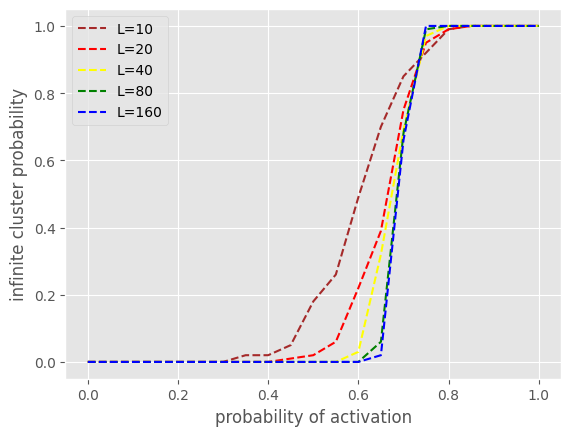

In [ ]:

color = ['brown', 'red', 'yellow', 'green', 'blue']
handles = []
for i,l in enumerate(L):
  line, = plt.plot(pdistribution, result[i], linestyle='--', c=color[i], label=f'L={l}')
  handles.append(line)

plt.xlabel('probability of activation')
plt.ylabel('infinite cluster probability')
plt.legend(handles=handles)
plt.show()

In [ ]:
np.argmax(result[-1])*0.05

0.75

# **5.Probability of being part of an infinite cluster**

In [ ]:
pdistribution = np.arange(0.0, 1.05, 0.05)
L = [10, 20, 40, 80, 160]
result=np.zeros(shape=(len(L),len(pdistribution)))

for i, l in enumerate(L):
  for j, p in enumerate(pdistribution):
    prob= []
    for k in range(100):
      mat, values,s ,percolation_result = Hoshen_Kopelman2(l,p)#i used second function cuz the first function here wont work properly,beacuse initial 1s column it is biased
      mask=np.isin(mat,values)
      mat[mask]=1
      mat[~mask]=0#here i delete every element that arent in the infinite cluster
      if percolation_result == 1:
        n = np.count_nonzero(mat)#total values of 1s(values on the infinite clusters)
        prob.append(n / ( l* (l - 1)))

      else:
        prob.append(0)

    result[i,j]=np.mean(prob)



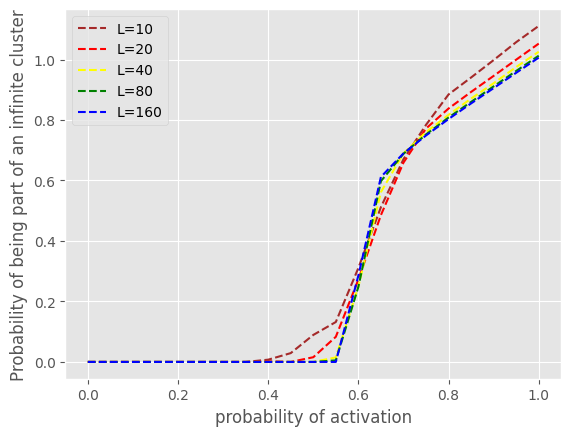

In [ ]:
color = ['brown', 'red', 'yellow', 'green', 'blue']
handles = []
for i,l in enumerate(L):
  line, = plt.plot(pdistribution, result[i], linestyle='--', c=color[i], label=f'L={l}')
  handles.append(line)

plt.xlabel('probability of activation')
plt.ylabel('Probability of being part of an infinite cluster')
plt.legend(handles=handles)
plt.show()

# **6.Correlation length**

In [4]:
#here i will create a function that takes the result of Hoshen-Kopeman2 func and calculate correcaltion length
def correlation_length(mat,S,value):
  values=[]

  for i, val in enumerate(S):
    if val!=0 and (i not in value):#i wont consider infinite clusters
      y, x = np.where(mat == i)
      if len(x) == 0 or len(y) == 0:#making sure cluster is not empty
        continue
      x_cm = np.mean(x)
      y_cm = np.mean(y) #calculating center of mass

      rg = np.sqrt(np.mean((x - x_cm) ** 2 + (y - y_cm) ** 2))#calculating Radius of Gyration
      values.append(rg)
  if len(values)==0:
    return 0
  else:
    return np.mean(values)






In [ ]:
L = [10, 20, 40, 80, 160]
p = np.arange(0.0, 1.05, 0.05)
corr_len=np.zeros(shape = (len(L), len(p)))

for i, l in enumerate(L):
  for j,p_val in enumerate(p):
    v=[]
    for k in range(100):
      mat, values, S, result = Hoshen_Kopelman2(l,p_val)
      v.append(correlation_length(mat, S, values))

    if len(v)==0:
      corr_len[i,j]=0
    else:
      corr_len[i,j]=np.mean(v)

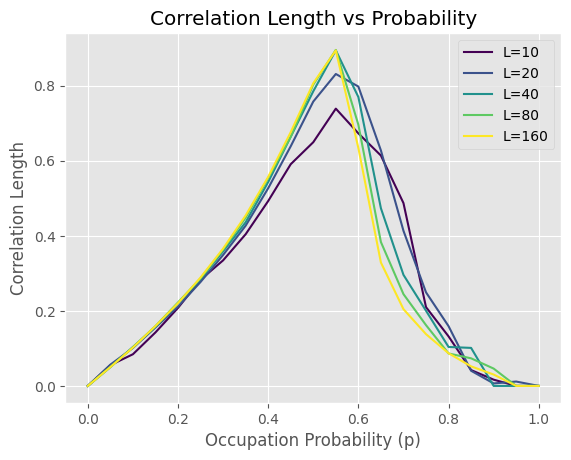

In [34]:
color = plt.cm.viridis(np.linspace(0, 1, len(L)))

for i, l in enumerate(L):
    plt.plot(p, corr_len[i], linestyle='-', color=color[i], label=f'L={l}')

plt.xlabel("Occupation Probability (p)")
plt.ylabel("Correlation Length")
plt.title("Correlation Length vs Probability")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
#the critical point is around p=0.5 and p=0.7 i will only use this range for better visualization
L = [10, 20, 40, 80, 160]
p = np.arange(0.5, 0.7, 0.0025)
corr_len=np.zeros(shape = (len(L), len(p)))

for i, l in enumerate(L):
  for j,p_val in enumerate(p):
    v=[]
    for k in range(100):
      mat, values, S, result = Hoshen_Kopelman2(l,p_val)
      v.append(correlation_length(mat, S, values))

    if len(v)==0:
      corr_len[i,j]=0
    else:
      corr_len[i,j]=np.mean(v)


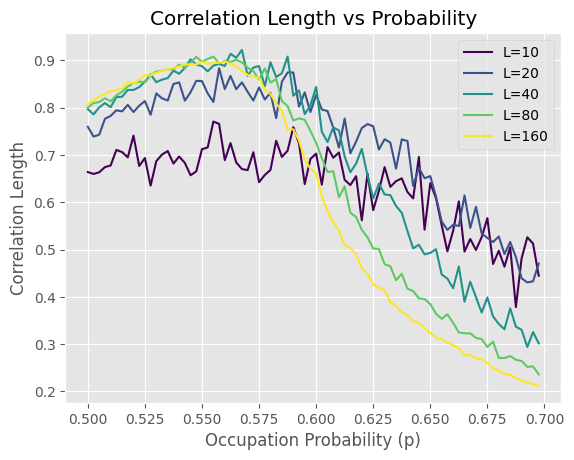

In [6]:
color = plt.cm.viridis(np.linspace(0, 1, len(L)))

for i, l in enumerate(L):
    plt.plot(p, corr_len[i], linestyle='-', color=color[i], label=f'L={l}')

plt.xlabel("Occupation Probability (p)")
plt.ylabel("Correlation Length")
plt.title("Correlation Length vs Probability")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
p_cs = np.argmax(corr_len, axis=1)*0.0025+0.5
pc=0.5927
model=LinearRegression()
model.fit(np.log(np.abs(p_cs-pc)).reshape(-1,1),np.log(L))
model.coef_[0]
#you can see pc for L=160 is 0.56 and for infinite sample size it is 0.5927 its fairly close beacuse critical exponent is very close to its theoratical value 1.333(4/3)

np.float64(-1.3378917649151145)

# **7.critical exponent for binding percolation**

In [29]:
#first i will update hoshen kopelman function so it can handle binding percolation
def Hoshen_kopelman_binding(L,p):

  mat=np.zeros(shape=(L,L),dtype=np.uint64)
  hbond=np.random.rand(L,L-1)#contains probability for horizontal bonds
  vbond=np.random.rand(L-1,L)#the same for vertical bonds

  value=1
  S=[0]#again for saving each cluster size
  for j in range(L):
    for i in range(L):
      neighbors=[]
      if i > 0 and  vbond[i-1,j] <= p:
        neighbors.append(mat[i-1,j])

      if j > 0 and hbond[i,j-1] <= p:
        neighbors.append(mat[i,j-1])

      if len(neighbors)==0:
        mat[i,j]=value
        S.append(1)
        value+=1

      elif len(neighbors)==1:
        mat[i,j]=neighbors[0]
        S[neighbors[0]]+=1

      else:
        min_label=min(neighbors)
        mat[i,j]=min_label
        S[min_label]+=1
        for label in neighbors:
          if label != min_label:
            S[min_label]+=S[label]
            S[label]=0
            mat[mat==label]=min_label

  values=set()
  for i in range(L):
    for j in range(L):
      if mat[i, 0] != 0 and mat[i, 0] == mat[j, -1]:
        values.add(mat[i,0])

  return (mat, S, list(values))


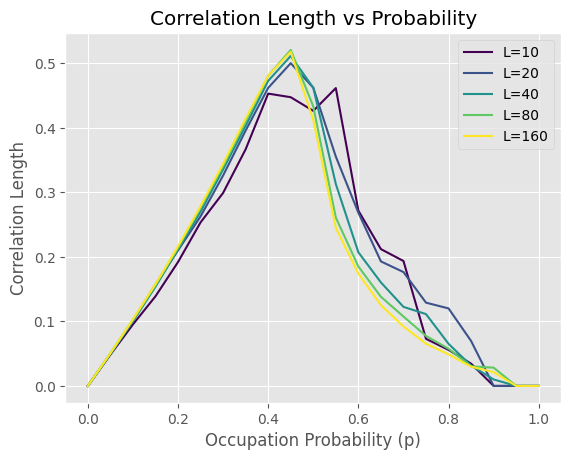

In [31]:
#now the proccess is as before
L = [10, 20, 40, 80, 160]
p = np.arange(0.0, 1.05, 0.05)
corr_len=np.zeros(shape = (len(L), len(p)))

for i, l in enumerate(L):
  for j,p_val in enumerate(p):
    v=[]
    for k in range(50):
      mat, S, values = Hoshen_kopelman_binding(l,p_val)
      v.append(correlation_length(mat, S, values))

    if len(v)==0:
      corr_len[i,j]=0
    else:
      corr_len[i,j]=np.mean(v)
color = plt.cm.viridis(np.linspace(0, 1, len(L)))

for i, l in enumerate(L):
    plt.plot(p, corr_len[i], linestyle='-', color=color[i], label=f'L={l}')

plt.xlabel("Occupation Probability (p)")
plt.ylabel("Correlation Length")
plt.title("Correlation Length vs Probability")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
#the critical point is around p=0.5 and p=0.7 i will only use this range for better visualization
L = [10, 20, 40, 80, 160]
p = np.arange(0.43, 0.55, 0.0025)
corr_len=np.zeros(shape = (len(L), len(p)))

for i, l in enumerate(L):
  for j,p_val in enumerate(p):
    v=[]
    for k in range(50):
      mat, S, values = Hoshen_kopelman_binding(l,p_val)
      v.append(correlation_length(mat, S, values))

    if len(v)==0:
      corr_len[i,j]=0
    else:
      corr_len[i,j]=np.mean(v)


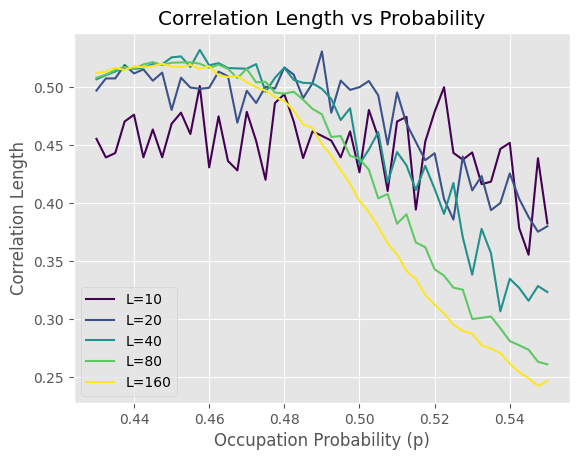

In [34]:
color = plt.cm.viridis(np.linspace(0, 1, len(L)))

for i, l in enumerate(L):
    plt.plot(p, corr_len[i], linestyle='-', color=color[i], label=f'L={l}')

plt.xlabel("Occupation Probability (p)")
plt.ylabel("Correlation Length")
plt.title("Correlation Length vs Probability")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
p_cs = np.argmax(corr_len, axis=1)*0.0025+0.5
pc=0.5
model=LinearRegression()
model.fit(np.log(np.abs(p_cs-pc)).reshape(-1,1),np.log(L))
model.coef_[0]

np.float64(-1.3627861956851062)

# **8.Cluster Growth**

<ipython-input-38-d98eba4a09e6>:49: RuntimeWarning: divide by zero encountered in log
  log_s = np.log(sizes[i])
<ipython-input-38-d98eba4a09e6>:50: RuntimeWarning: divide by zero encountered in log
  log_rg = np.log(rgs[i])


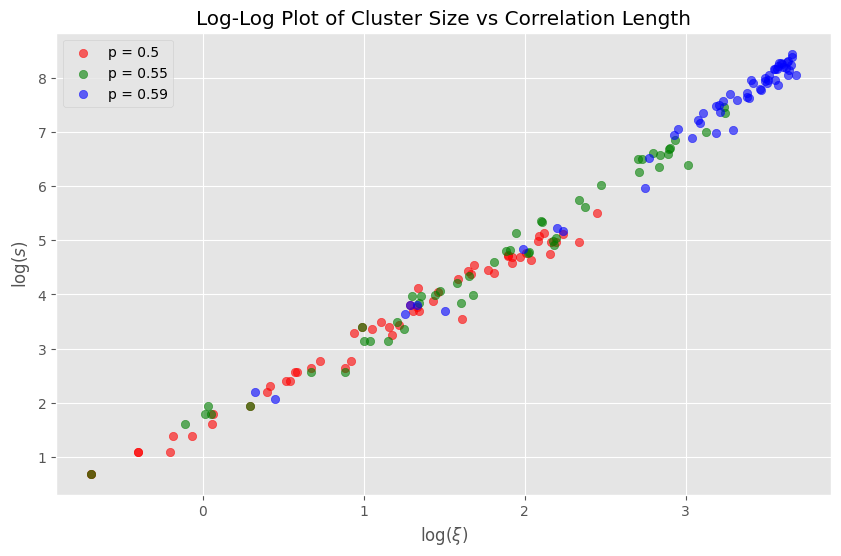

In [38]:

def Cluster_Growth(mat, p, i, j, pro):
  neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
  if mat[i, j] != 0:
        return
  if p[i, j] <= pro:
        mat[i, j] = 1
  else:
        mat[i, j] = 2#i used 2 for block cells
        return

  for x, y in neighbors:
    if 0 <= i + x < mat.shape[0] and 0 <= j + y < mat.shape[1] and mat[i + x, j+y] == 0:
      Cluster_Growth(mat, p, i + x, j + y, pro)

def calculate_cluster_properties(mat):#the same as correlation_length function, just update it a little for this question
    x, y = np.where(mat == 1)
    s = len(x)
    if s == 0:
        return 0, 0

    x_cm, y_cm = np.mean(x), np.mean(y)
    rg = np.sqrt(np.mean((x - x_cm)**2 + (y - y_cm)**2))
    return s, rg

L = 100
mat = np.zeros(shape=(L,L))
p = np.random.rand(L,L)


pro_val=[0.5, 0.55, 0.59]
sizes = np.zeros(shape=(len(pro_val),100))
rgs = np.zeros(shape=(len(pro_val),100))#for saving results


for k, pro in enumerate(pro_val):
  for i in range(100 ):
    mat = np.zeros((L, L))
    prob = np.random.rand(L, L)
    #xstart, ystart = np.random.randint(0,L,size=2)
    Cluster_Growth(mat, prob, L//2, L//2, pro)#here i start from center,starting point could be random
    sizes[k, i], rgs[k, i] = calculate_cluster_properties(mat)


plt.figure(figsize=(10, 6))

colors = ['red', 'green', 'blue']

for i, p in enumerate(pro_val):
    log_s = np.log(sizes[i])
    log_rg = np.log(rgs[i])
    plt.scatter(log_rg, log_s, label=f'p = {p}', color=colors[i], alpha=0.6)


plt.xlabel(r'$\log(\xi)$')
plt.ylabel(r'$\log(s)$')
plt.title('Log-Log Plot of Cluster Size vs Correlation Length')
plt.legend()
plt.grid(True)
plt.show()

# **9.Transformation**

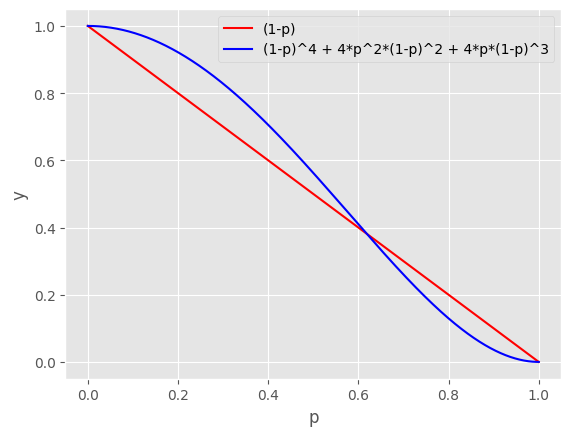

array([0.   , 0.618, 1.   ])

In [14]:
p=np.arange(start=0, stop=1.0001, step=0.0001)
y1 = 1 - p
y2 = (1 - p)**4 + 4 * p**2 *(1 - p)**2 + 4* p * (1 - p)**3
plt.plot(p, y1, label='(1-p)',color='red')
plt.plot(p, y2, label='(1-p)^4 + 4*p^2*(1-p)^2 + 4*p*(1-p)^3',color='blue')
plt.xlabel('p')
plt.ylabel('y')
plt.legend()
plt.show()
p[np.abs(y1-y2)<0.00003]

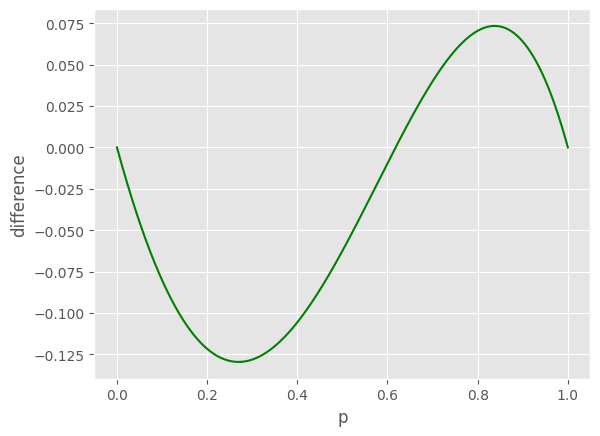

In [15]:
plt.plot(p, y1-y2,color='green')
plt.xlabel('p')
plt.ylabel('difference')
plt.show()

In [16]:
#now lets solve the equation
from scipy.optimize import fsolve

def equation(p):
    return p - (p**4 + 4 * p**3 * (1 - p) + 4 * p**2 * (1 - p)**2)

initial_guess = 0.5
solution = fsolve(equation, initial_guess)
print("The solution is:", solution)
#so the another result is p=0.382 which is the probability of having inactive cell which is equavalent to p=0.618 of the probability of having active cell.

The solution is: [0.38196601]
